### 1. Problem Statement



 Use relevant machine learning model to predict total sales by using features like money spent on marketing (advertising) on individual items.


### 2. Import Basic libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# clear warnings

import warnings
warnings.filterwarnings('ignore')

###  3. Importing the dataset


In [3]:
data = pd.read_csv("Advertising.csv")
data

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9
...,...,...,...,...,...
195,196,38.2,3.7,13.8,7.6
196,197,94.2,4.9,8.1,9.7
197,198,177.0,9.3,6.4,12.8
198,199,283.6,42.0,66.2,25.5


In [4]:
# dropping the irrelevant column

data.drop('Unnamed: 0', axis=1, inplace =True)
data

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,9.7
197,177.0,9.3,6.4,12.8
198,283.6,42.0,66.2,25.5


 ### 4. Domain analysis

- Target variable is Sales 
- Input variables are TV, Radio and Newspaper
- This data tells us about the total sales made by the company by investing certain amount on TV, Radio and Newspaper advertising.

- TV- amount spent on TV advertisement in dollars
- Radio- amount spent on Radio advertisement in dollars
- Newspaper- amount spent on Newspaper advertisement in dollars
- Sales- amount of sales in thousands

### 5.  Basic checks

In [7]:
#shape

data.shape

(200, 4)

In [8]:
#head

data.head(2)

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4


In [9]:
# tail

data.tail

<bound method NDFrame.tail of         TV  Radio  Newspaper  Sales
0    230.1   37.8       69.2   22.1
1     44.5   39.3       45.1   10.4
2     17.2   45.9       69.3    9.3
3    151.5   41.3       58.5   18.5
4    180.8   10.8       58.4   12.9
..     ...    ...        ...    ...
195   38.2    3.7       13.8    7.6
196   94.2    4.9        8.1    9.7
197  177.0    9.3        6.4   12.8
198  283.6   42.0       66.2   25.5
199  232.1    8.6        8.7   13.4

[200 rows x 4 columns]>

In [11]:
# columns

data.columns

Index(['TV', 'Radio', 'Newspaper', 'Sales'], dtype='object')

In [12]:
# dtypes

data.dtypes

TV           float64
Radio        float64
Newspaper    float64
Sales        float64
dtype: object

In [13]:
# info

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [14]:
# describe

data.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


#### Insights from describe()

- The average TV, Radio, Newspaper investment will be 147, 23, 30 whereas the average sales will be 14.02m$ 
- The minimum investment on TV, Radio, Newspaper will be 0.70, 0, 0.30 whereas min sales will be 1.6
- The maximum investment on TV, Radio, Newspaper will be 296.54, 49.6, 114 whereas max sales will be  27
- The spread of data(investment) will be high on TV compared to others.

In [15]:
# check out the missing values
data.isnull().sum()

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

### 6. Exploratory Data Analysis (EDA)

### Univariate analysis
- Analysing single variable
- Check the distribution of each column

#### histplot

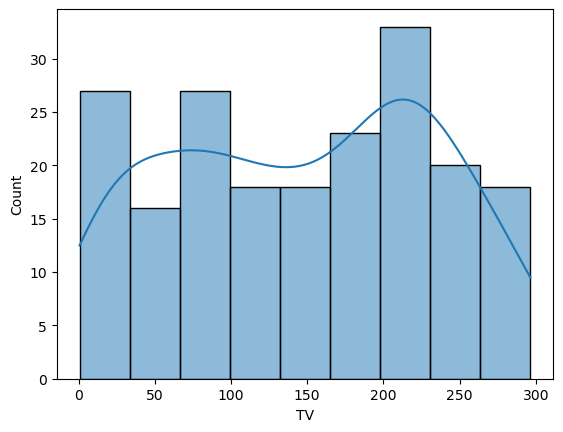

In [19]:
#check distribution of TV
sns.histplot(data=data, x='TV',kde=True)
plt.show()

<Axes: xlabel='TV', ylabel='Density'>

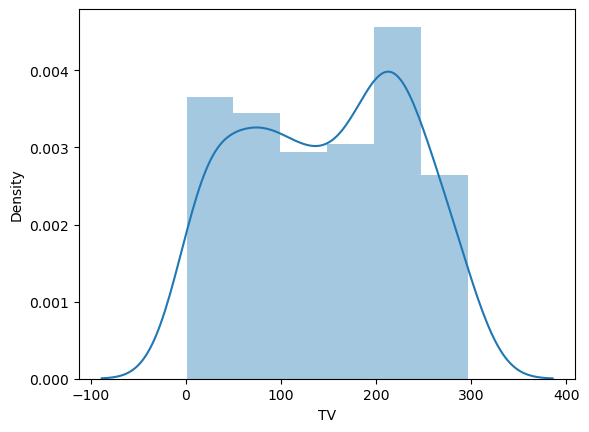

In [16]:
sns.distplot(data.TV)

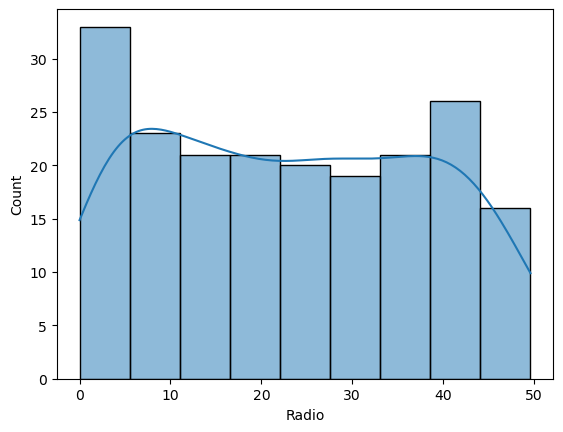

In [20]:
#check the distribution of radio
sns.histplot(data=data, x='Radio',kde=True)
plt.show()

<Axes: xlabel='Radio', ylabel='Density'>

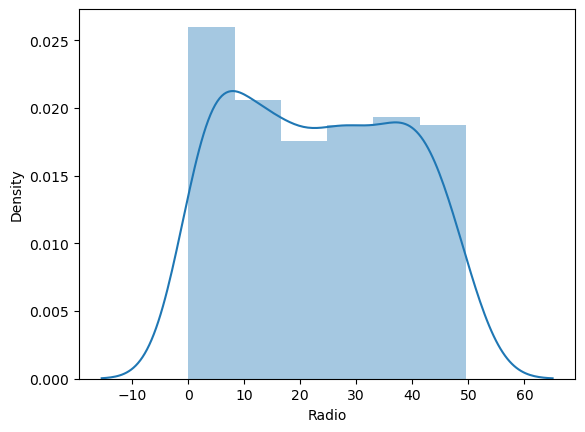

In [17]:
sns.distplot(data.Radio)

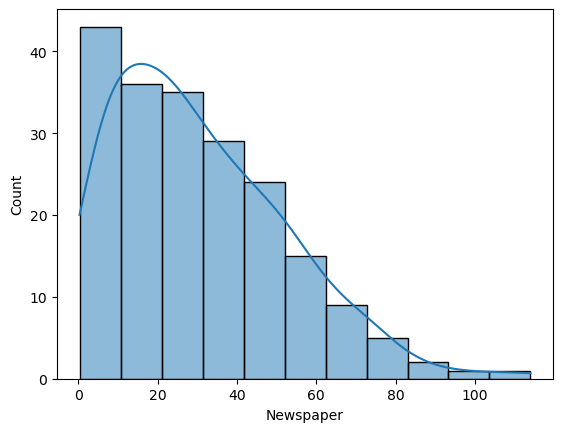

In [21]:
#check the distribution of newspaper
sns.histplot(data=data, x='Newspaper',kde=True)
plt.show()

<Axes: xlabel='Newspaper', ylabel='Density'>

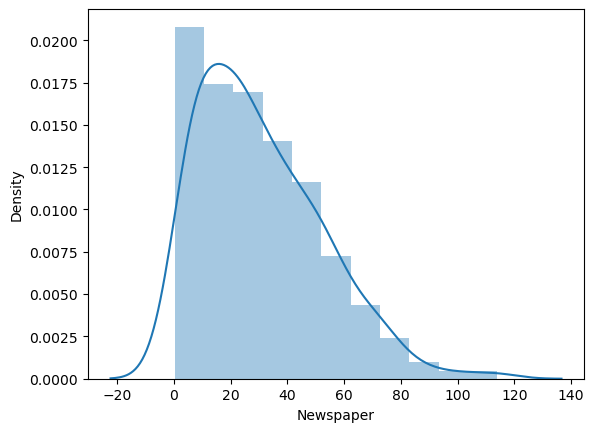

In [18]:
sns.distplot(data.Newspaper)

<Axes: xlabel='Sales', ylabel='Density'>

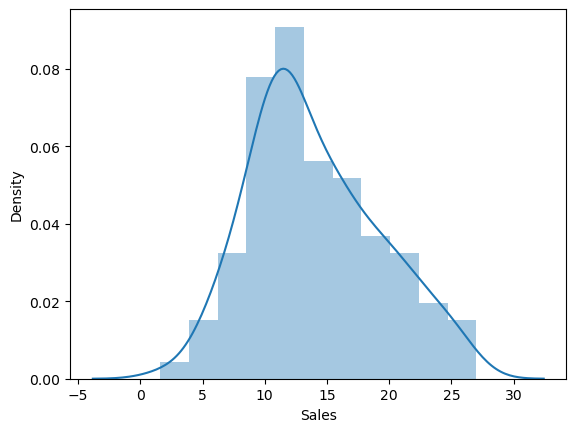

In [20]:
#check the distribution of sales
sns.distplot(data.Sales)

##### Insights
- Sales is representing normal distribution 
- TV, Radio and Newspaper are representing skewness/ not normal
- The range of investment for TV is from 0 to 290 and the investment is uniform
- The range of investment for Radio is from 0 to 490 and the investment is uniform.
- The range of investment for Newspaper is from 0 to 110 and the investment is not uniform.

#### Bivariate analysis
- Analysing two variables
- we have only numerical columns so go for relational plots(line, scatter, relplots)

<Axes: xlabel='TV', ylabel='Sales'>

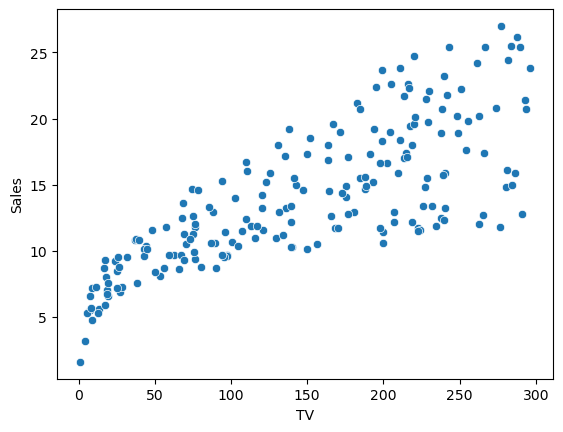

In [23]:
#Analyse how amount spent on TV impact sales
sns.scatterplot(data=data, x='TV',y ='Sales')

#### Insights

-There is positive relationship between TV and sales
(if investment on TV increases, sales also increases)i.e., high correlation

<Axes: xlabel='Radio', ylabel='Sales'>

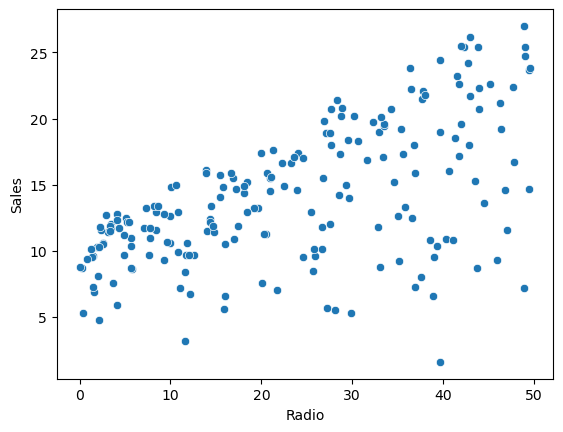

In [24]:
#analyse how amount spent on radio impact sales

sns.scatterplot(data=data, x='Radio',y ='Sales')

#### Insights
- There is no strong relationship between Radio and sales
- The increase in investment on Radio will increase the sales but it is not accurate all the time
 (kind of mixed conclusions)

<Axes: xlabel='Newspaper', ylabel='Sales'>

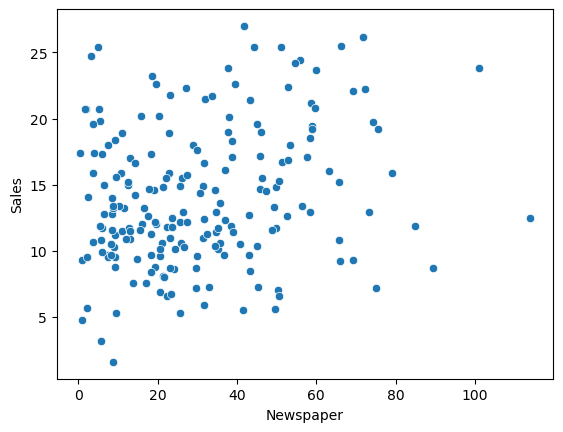

In [26]:
#analyse how amount spent on Newspaper impact sales

sns.scatterplot(data=data, x='Newspaper',y ='Sales')

#### Insights
- There is no relationship between Newspaper and sales.
- So investing more on newspaper is not a good practice, in order to achieve the good profit.

### multivariate analysis

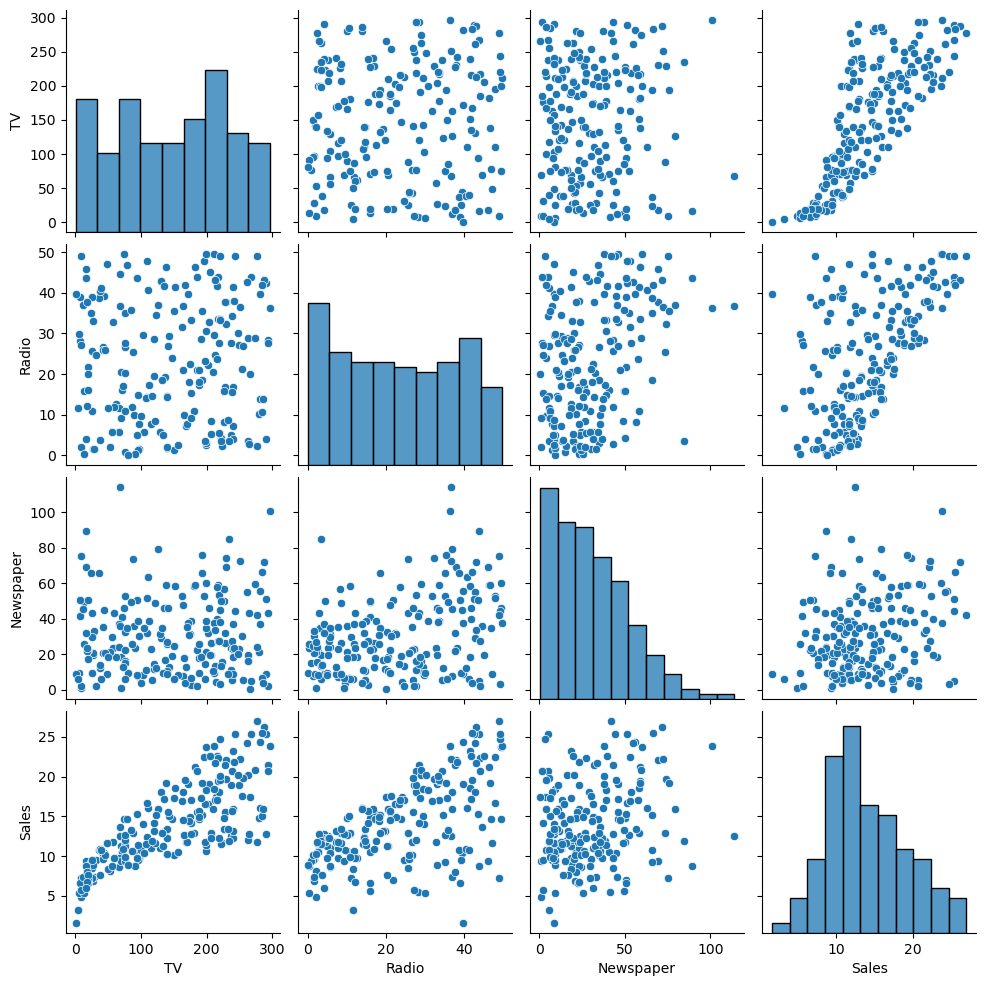

In [23]:
#pairplot
sns.pairplot(data=data)

### 7. Data preprocessing
#### -check for missing values, 
#### -check for duplicates
#### -check outliers and handle them (if only less than 5%)
#### -scaling (if outliers>5%),
#### -balancing the dataset
#### -conversion of categorical data into numerical data

In [28]:
data

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9
...,...,...,...,...,...
195,196,38.2,3.7,13.8,7.6
196,197,94.2,4.9,8.1,9.7
197,198,177.0,9.3,6.4,12.8
198,199,283.6,42.0,66.2,25.5


In [13]:
data.drop('Unnamed: 0',axis=1,  inplace=True)
data

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,9.7
197,177.0,9.3,6.4,12.8
198,283.6,42.0,66.2,25.5


#### Check for missing values 

In [14]:
#check for missing values and handle them
data.isnull().sum()

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

#### Check for duplicates 

In [15]:
#check for duplicates
data.duplicated().sum()

0

#### check the outliers

-Outliers are identified only in numerical columns(in continuous data)

<Axes: xlabel='TV'>

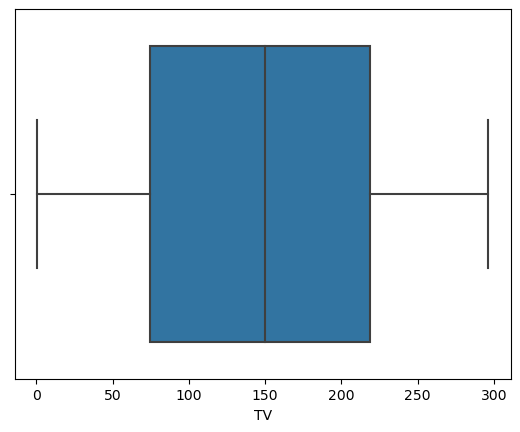

In [16]:
#check outliers in TV
sns.boxplot(data= data, x = 'TV')

<Axes: xlabel='Radio'>

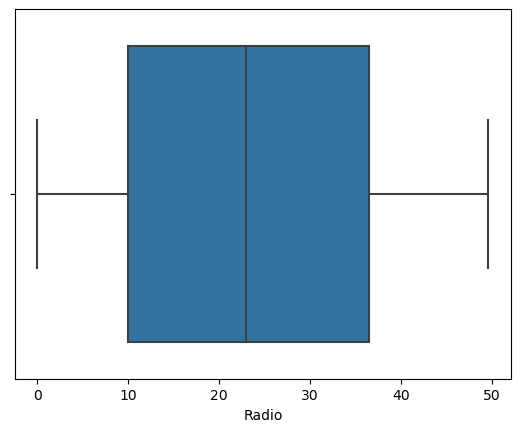

In [17]:
#check outliers in Radio
sns.boxplot(data=data, x='Radio')

<Axes: xlabel='Newspaper'>

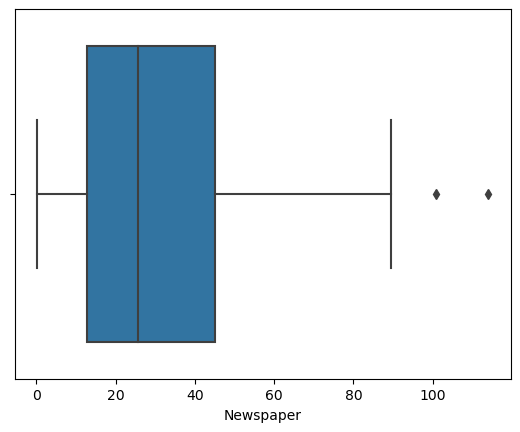

In [29]:
#check the outliers for newspaper
sns.boxplot(data=data, x='Newspaper')

<Axes: xlabel='Sales'>

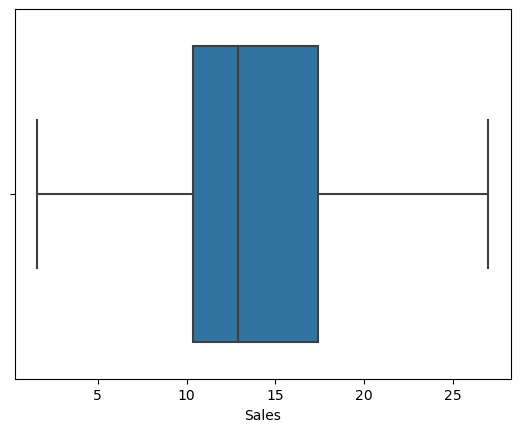

In [37]:
# Check the outliers for sales
sns.boxplot(data=data, x ="Sales")

### Only newspaper column has few outliers (as shown in right side as per box plot)
#### To check the outliers- 2 methods
#### 1. IQR METHOD (if data is not normal)
#### 2. emphirical rule(normal distribution)


In [ ]:
# since newspaper variable has non- normal data, go for IQR method

In [ ]:
# IQR = Q3 - Q1
# lower limit = Q1- 1.5(IQR)
# upper limit = Q3 + 1.5(IQR)
# find values which are greater than upper limit and lesser than lower limit

In [19]:
# to find q1 and q3
# method 1:
q1 = data["Newspaper"].quantile(0.25)
q3 = data['Newspaper'].quantile(0.75)
print(f'lower quartile is {q1}')
print(f'upper quartile is {q3}')

lower quartile is 12.75
upper quartile is 45.1


In [20]:
#method 2:
data.Newspaper.describe()

count    200.000000
mean      30.554000
std       21.778621
min        0.300000
25%       12.750000
50%       25.750000
75%       45.100000
max      114.000000
Name: Newspaper, dtype: float64

In [21]:
#find iqr , lower limit, upper limit
iqr= q3 - q1 
lower_limit = q1 - 1.5*iqr
upper_limit = q3 + 1.5*iqr
print(f'Lower_limit is {lower_limit}')
print(f'upper limit is {upper_limit}')

Lower_limit is -35.775000000000006
upper limit is 93.625


In [22]:
#filter the values 
data.loc[(data['Newspaper'] < lower_limit)]

,TV,Radio,Newspaper,Sales


In [23]:
data.loc[(data['Newspaper']> upper_limit)]

,TV,Radio,Newspaper,Sales
16,67.8,36.6,114.0,12.5
101,296.4,36.3,100.9,23.8


In [24]:
# To find the percentage of outliers
len(data.loc[(data['Newspaper']> upper_limit)])/ len(data)

0.01

In [25]:
#since the outliers <0.05 or 5%, they can be handled.
#Since data is not normal, replace outliers with the median
data.loc[(data['Newspaper']> upper_limit), 'Newspaper'] =data["Newspaper"].median()

<Axes: xlabel='Newspaper'>

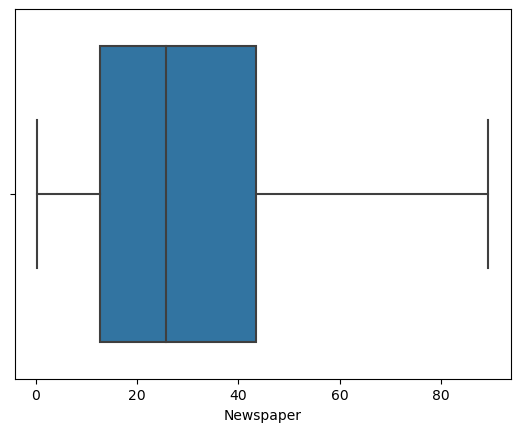

In [44]:
# now check for outliers again to ensure whether they are successfully eliminiated
sns.boxplot(data=data, x='Newspaper')

In [ ]:
# Skipping scaling (in this data, there is no need for scaling)

In [ ]:
# Skipping conversion of categorical data into numerical data (we don't have categorical data here) 

### 8. Feature selection /  Features Engineering

In [ ]:
# drop irrelevant columns
# selecting best features

#### 1.Linearity:  
#### drop the col which has- less correlation with the target variable
- Because, if there are many no of columns, training with all those columns might result in OVERFITTING. So, we can drop few columns which do not have high correlation with the output variable.

(in this dataset, since it is small, we are not dropping any column)

#### 2. Little or no multicollinearity: 
#### Drop one of the col if two input variables have high correlation

In [5]:
data.corr()

,TV,Radio,Newspaper,Sales
TV,1.000000,0.054809,0.056648,0.782224
Radio,0.054809,1.000000,0.354104,0.576223
Newspaper,0.056648,0.354104,1.000000,0.228299
Sales,0.782224,0.576223,0.228299,1.000000


#### "Checking for linearity" 

<Axes: >

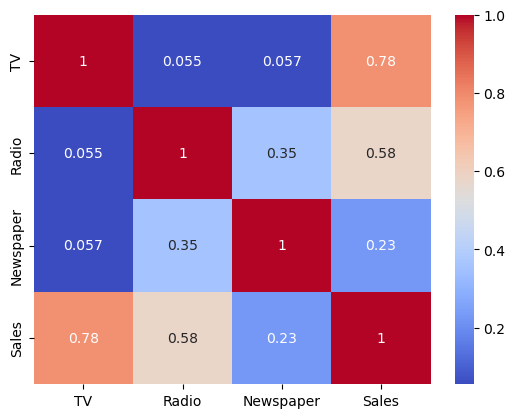

In [33]:
sns.heatmap(data.corr(),annot=True,cmap='coolwarm')
# annot = True is used for labelling the corr values


In [ ]:
# Newspaper has less corrrelation with sales.
# But we not dropping newspaper since the dataset is small with less no of columns

#### "Checking for multicollinearity"

<Axes: >

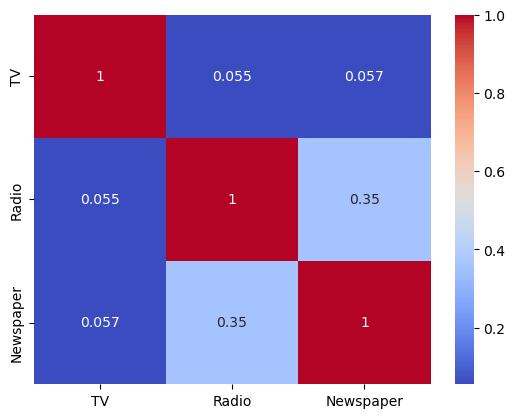

In [34]:
sns.heatmap(data.drop('Sales',axis=1).corr(),annot=True,cmap='coolwarm')

In [ ]:
# here we don't have any high correlated input variables, 
# hence we are not dropping any input variable.

#### Heat map analysis:
#### Lineriarity:
- We include col which has high corr with the target.
- We drop col which has less correlation with the target.

#### Little or no multicollinearity:
- we include col which has less corr among each other.
- we drop one of the columns if two input variables have high correlation.

### 9. Model implementation:

### Splitting the data

In [ ]:
#Training data

In [6]:
data

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,9.7
197,177.0,9.3,6.4,12.8
198,283.6,42.0,66.2,25.5


### Splitting data into x and y

In [26]:
# method 1:
X = data.loc[:,'TV':'Newspaper'] # first column to last column indexing(n-1)/ column names
y=  data['Sales']

In [27]:
# method 2:
X= data.drop('Sales', axis = 1)

In [28]:
X

,TV,Radio,Newspaper
0,230.1,37.8,69.2
1,44.5,39.3,45.1
2,17.2,45.9,69.3
3,151.5,41.3,58.5
4,180.8,10.8,58.4
...,...,...,...
195,38.2,3.7,13.8
196,94.2,4.9,8.1
197,177.0,9.3,6.4
198,283.6,42.0,66.2


In [29]:
y

0      22.1
1      10.4
2       9.3
3      18.5
4      12.9
       ... 
195     7.6
196     9.7
197    12.8
198    25.5
199    13.4
Name: Sales, Length: 200, dtype: float64

### Splitting data for training and testing: 

In [30]:
#Train-test-split

### sklearn
It is one of the scientific libraries which includes all the packages related to Machine Learning,
data cleaning and feature engineering.

In [31]:
from sklearn.model_selection import train_test_split #sklearn--scikit learn

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.20,random_state=42)
#random state- it will give random possibility and the number can be anything
# so that each time we run the training , the model will take the random set of data for training  

In [32]:
X_train.shape #so for training, only 160 entries are taken (i.e., only 80% data for training)

(160, 3)

In [33]:
X_test.shape

(40, 3)

### Model building

In [34]:
# Import Linear Regression model
from sklearn.linear_model import LinearRegression

#Initialise model
model = LinearRegression()

#Train model with X_train, y_train
model.fit(X_train, y_train)

LinearRegression()

In [35]:
# make predictions /test model
# Testing
y_pred = model.predict(X_test)
y_pred

array([16.39801829, 20.8869083 , 21.55131318, 10.60254668, 22.1423026 ,
       13.09532134, 21.06962388,  7.46295705, 13.61184395, 15.15541424,
        9.06546264,  6.64575639, 14.3052698 ,  8.91760551,  9.68426938,
       12.15697596,  8.72918294, 16.27728191, 10.27445129, 18.84780973,
       19.53827866, 13.01488214, 12.35349186, 21.28817475,  7.84004186,
        5.80585054, 20.76530595, 11.99150763,  9.18144442,  8.5244824 ,
       12.46600306, 10.00930393, 21.3808855 , 12.21814792, 18.26210097,
       20.1607571 , 14.07747281, 20.84085203, 11.03029381,  4.5650485 ])

In [36]:
# slopes/ coefficient of x
model.coef_

array([0.04474929, 0.18959241, 0.00211938])

In [37]:
# intercept
model.intercept_

2.9872240577320657

In [39]:
# task:
# What will be the total sales if my investment on TV= 100, Radio=50, Newspaper=10

In [31]:
# How to make predictions
model.predict([[100, 50, 10]]) # since there multiple inputs, give 2 dimensional bracket

array([16.93938294])

In [ ]:
# task:
What will be the total sales if my investment on TV =1000, radio = 300, Newspaper = 50

In [32]:
model.predict([[1000, 300, 50]])

array([104.60515679])

#### Insights:
- So investment on TV yields more sales than Newspaper

In [28]:
y_test # y actual

95     16.9
15     22.4
30     21.4
158     7.3
128    24.7
115    12.6
69     22.3
170     8.4
174    11.5
45     14.9
66      9.5
182     8.7
165    11.9
78      5.3
186    10.3
177    11.7
56      5.5
152    16.6
82     11.3
68     18.9
124    19.7
16     12.5
148    10.9
93     22.2
65      9.3
60      8.1
84     21.7
67     13.4
125    10.6
132     5.7
9      10.6
18     11.3
55     23.7
75      8.7
150    16.1
104    20.7
135    11.6
137    20.8
164    11.9
76      6.9
Name: Sales, dtype: float64

### 10. Model  Evaluation

#### Loss functions /error functions to know the difference between actual and predicted values
#### Different loss functions in Regression algorithms are
- MSE (Mean squared error)
- MAE (Mean absolute error)
- RMSE(Root mean squared error)

In [40]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

In [43]:
# MSE
MSE = mean_squared_error(y_test, y_pred)
MSE

3.1581240391626855

In [44]:
# MAE
MAE = mean_absolute_error(y_test, y_pred)
MAE

1.4517793168736202

In [45]:
# RMSE
RMSE = np.sqrt(MSE)
RMSE

1.7771111499179464

In [48]:
# r2 score
# range of r2 score is 0 to 1?
# If r2 score is near to 1, it's a good model
# If r2 score is near to 0, it's a bad model
r2_score(y_test, y_pred) # this is the main accuracy check

0.8999440917857243

In [ ]:
# 89% better model to make predictions
# Model has learnt  89% of the information.

In [ ]:
# If the model has high no of independent variables which has less correlation with the target 
variable, r2 score increases (fake hero). Hence go for adjusted r2score (true hero)

# Adjusted r2 score measures the performance of the model by ignoring the input variables
which has less correlation with the output variable.

In [51]:
## Adjusted r2  score

#1-(1-r2score)*(no. of rows in x_test - 1)/(no.of.rows in x_test -  no of columns in x_test - 1)

In [47]:
# no of rows and columns in X_test
X_test.shape

(40, 3)

In [50]:
adjusted_r2=1-(1-0.89)*(40-1)/(40-3-1)

In [51]:
adjusted_r2

0.8808333333333334

In [ ]:
#  Adjusted r2 score is less than r2 score , thus condition satisfied.